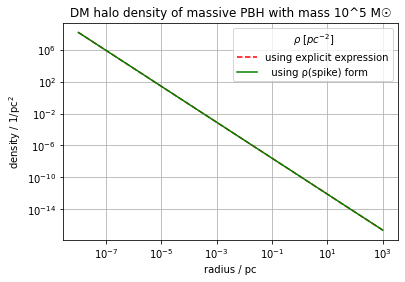

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import imripy
from imripy import merger_system as ms
from scipy.interpolate import interp1d





π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of yr
M_solar = 1.989e30
pc = 3.0857e16            # in meters





m1 =  1e5  # in units of Solar mass
m2 = 1     # in units of solar mass



def ρ_halo(m, r):
    return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) * (r**(-9/4))

 

# Definition of the binary system 
m_bar = 1e5   # in units of M_solar

D_luminosity = 5e8              # The distance to the system from earth as 500 Mpc



ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2*G*m_bar)**(3/4))



# Dark matter spike with alpha=9/4 for Primordial black holes case
r_spike = 1 # in parsecs, Choosen by choice

alpha = 9/4

rho_spike =  ρ_bar  *  (r_spike**(-9/4)) * ms.solar_mass_to_pc  # This takes the value of M_sun/pc^3 and converts it to 1/pc^2

spike = imripy.halo.Spike(rho_spike, r_spike, alpha)

r_grid = np.geomspace(1e-8, 1e3, 100)  # creates a grid in pc
plt.loglog(r_grid, ρ_halo(m1, r_grid) * ms.solar_mass_to_pc  , 'r--')
plt.loglog(r_grid, spike.density(r_grid), 'g')

plt.grid()
plt.legend(["using explicit expression","  using ρ(spike) form"], title='$ρ\hspace{0.3}[pc^{-2}]$')
plt.xlabel("radius / pc")
plt.ylabel("density / 1/pc$^2$")
plt.title('DM halo density of massive PBH with mass 10^5 M☉')
plt.savefig('density check.pdf')
plt.show()